In [0]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
import os
os.getcwd()

'/content'

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=15OtVU60D_tRpUV7fZ5awMRXQZsjGXn5Z' # The shareable link

In [16]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

15OtVU60D_tRpUV7fZ5awMRXQZsjGXn5Z


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Online Retail.xlsx')  
Retail_df = pd.read_excel('Online Retail.xlsx')
# Dataset is now stored in a Pandas Dataframe
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
from google.colab import files

In [0]:
RFM_level_agg.to_excel('RFM_level_agg.xlsx')


In [0]:
files.download('RFM_level_agg.xlsx')

In [0]:
from google.colab import files
files.upload()
!pip install -q kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json !/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
#Import Dataset
#Retail_df = pd.read_excel('Online Retail.xlsx') dframe.to_csv(“file_name.csv”, sep=’delimiter’)

#EDA


In [18]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
#View top 5 rows
Retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [20]:
#View row by column details
Retail_df.shape

(541909, 8)

In [21]:
#View all columns in dataset
Retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [22]:
#View summary statistics
Retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
#View other info about dataset
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [24]:
#Check for missing data
Retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [0]:
#Drop rows with missing data in Customer ID column
Retail_df1 = Retail_df.dropna(subset=['CustomerID'])

In [26]:
#Crosscheck missing data status
Retail_df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [27]:
Retail_df1.shape

(406829, 8)

In [28]:
#Check for duplicates
Retail_df1.duplicated(["UnitPrice"]).head()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [29]:
#Measure the spread of data distribution in the dataset
Retail_df1.std()

Quantity       248.693370
UnitPrice       69.315162
CustomerID    1713.600303
dtype: float64

In [30]:
#View unique countries 
Retail_df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [31]:
Retail_df1.Country.nunique()

37

In [32]:
#check the first and last transaction dates
Retail_df1["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [33]:
Retail_df1["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [0]:
Retail_df1.to_excel('Online_retail.xlsx')

#Descriptive Analysis

In [0]:
#Set graph theme and size
sns.set(style='whitegrid')

In [36]:
plt.figure(figsize=(11,9))

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

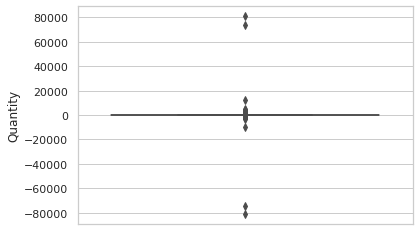

In [37]:
#boxplot of Quantity to detect outliers and negative values
sns.boxplot(data=Retail_df1, x= 'Quantity', orient='v')

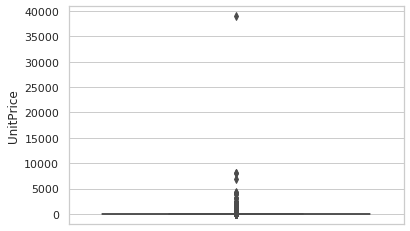

In [38]:
#boxplot of unit prices
sns.boxplot(data=Retail_df1, x= 'UnitPrice', orient='v')

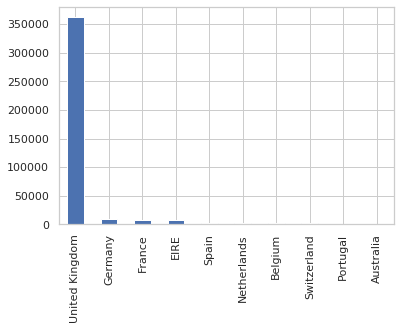

In [39]:
#Top 10 countries of customers
Retail_df1.Country.value_counts()[:10].plot(kind='bar')

#Cohort Analysis

In [40]:
#Invoice Month (Month of last purchase)
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
Retail_df1['InvoiceMonth'] = Retail_df1['InvoiceDate'].apply(get_month)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#Month Cohort (Month of first purchase)
#The groupby and transform are used for creating the cohort month
Retail_df1['CohortMonth'] = Retail_df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
#Cohort index (Month difference between first and last purchase)
def get_date(Retail_df1, column):
    year = Retail_df1[column].dt.year
    month = Retail_df1[column].dt.month
    day = Retail_df1[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(Retail_df1, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(Retail_df1, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
Retail_df1['CohortIndex'] = year_diff * 12 + month_diff + 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [43]:
Retail_df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [0]:
#Cohort 1: Active Users & Retention Rate...use groupby and pivot table functions.

In [0]:
#Active Users
Active_users = Retail_df1.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [0]:
cohort_count = Active_users.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')

In [41]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Retention Rate(%)
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


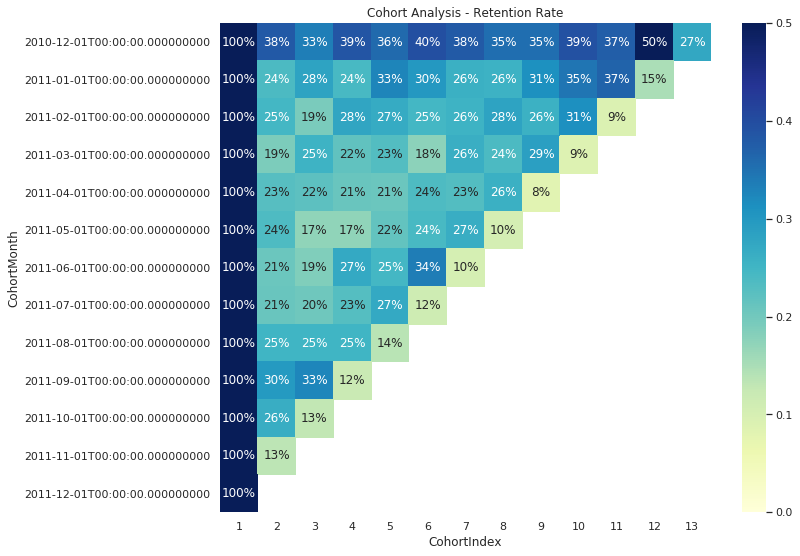

In [52]:
#Retention rate plot
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

Retention rate seems to be dropping from the second cohort index(month difference between first and last purchase), this implies that the farther apart the first and last purchase, the lower the retention rate.

#RFM METRICS & ANALYSIS

In [53]:
#Create new calculated columns to achieve Recency, Frequency and Monetary value
#TotalSum = Monetary
Retail_df1['TotalSum'] = Retail_df1['Quantity'] * Retail_df1['UnitPrice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#Present_date = Recency
Present_date = Retail_df1['InvoiceDate'].max() + timedelta(days=1)

In [0]:
#Grouping by CustomerID and deriving RFM
RFM = Retail_df1.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (Present_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [0]:
#Rename the columns 
RFM.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [57]:
#View new derived RFM
RFM.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


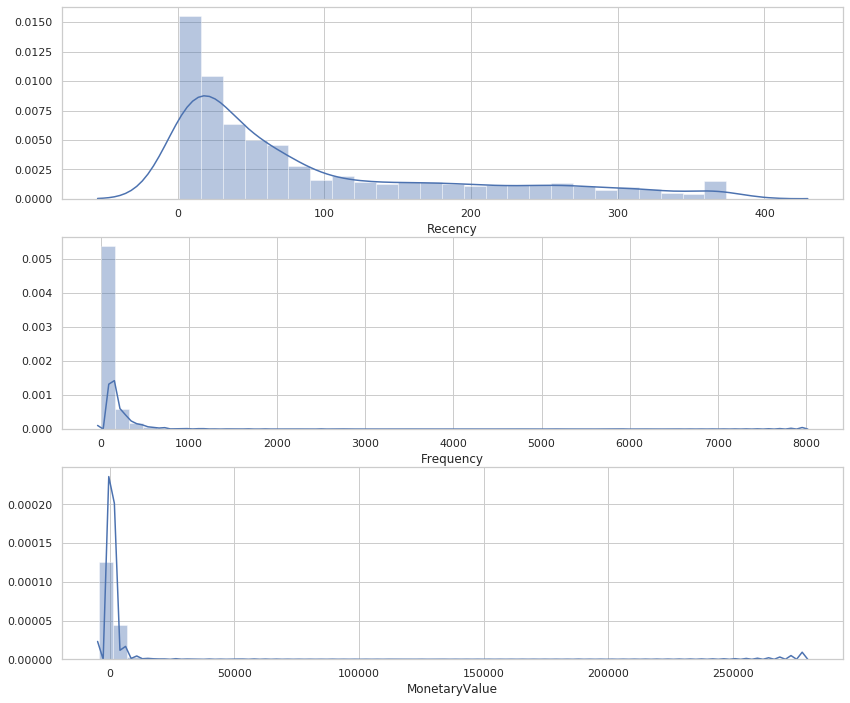

In [58]:
#RFM Distribution Plots

plt.figure(figsize=(14,12))
# Distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
# Distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
# Distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['MonetaryValue'])
plt.show()

In [0]:
#Calculate R and F groups
#Create labels for Recency, Frequency and Monetary
R_labels = range(4, 0, -1)
F_labels = range(1, 5)
m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
R_groups = pd.qcut(RFM['Recency'], q=4, labels=R_labels)
# Assign these labels to 4 equal percentile groups 
F_groups = pd.qcut(RFM['Frequency'], q=4, labels= F_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFM['MonetaryValue'], q=4, labels=m_labels)
# Create new columns R, F and M
RFM = RFM.assign(R = R_groups.values, F = F_groups.values, M = m_groups.values)

In [60]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


#RFM SEGMENTATION

In [61]:
#Concatenate RFM values to create RFM Segments
def join_rfm(x):
  return str(x['R']) + str(x['F']) + str(x['M'])
RFM['Join_RFM_Segment'] = RFM.apply(join_rfm, axis=1)
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,Join_RFM_Segment
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [62]:

RFM.Join_RFM_Segment.nunique()

62

In [63]:
#Sum RFM scores to single number to avoid having too many segments.
RFM['RFM_Score'] = RFM[['R','F','M']].sum(axis=1)
RFM['RFM_Score'].head()

CustomerID
12346.0     3.0
12347.0    12.0
12348.0     8.0
12349.0    10.0
12350.0     4.0
Name: RFM_Score, dtype: float64

In [0]:
# Assign labels from RFM score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(RFM.RFM_Score, q = 4, labels = score_labels)
RFM['RFM_Level'] = score_groups.values

In [65]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,Join_RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Green
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver
12349.0,19,73,1757.55,3,3,4,334,10.0,Silver
12350.0,310,17,334.40,1,1,2,112,4.0,Green


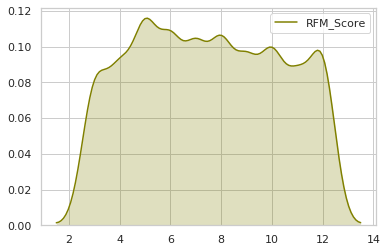

In [66]:
#sns.hist(data=RFM, x= 'RFM_Score', y ='RFM_Level', orient='v')
sns.kdeplot(RFM['RFM_Score'], shade=True, bw=.5, color="olive")


In [67]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_level_agg = RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
(RFM_level_agg)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Green       193.2      15.0         239.1  1300
Bronze       86.7      33.9         605.3   915
Silver       46.5      83.3        1404.8  1318
Gold         12.8     293.8        6655.4   839

In [68]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
RFM_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryValueMean', 'Count']
RFM_level_agg

,RecencyMean,FrequencyMean,MonetaryValueMean,Count
RFM_Level,,,,
Green,193.2,15.0,239.1,1300
Bronze,86.7,33.9,605.3,915
Silver,46.5,83.3,1404.8,1318
Gold,12.8,293.8,6655.4,839


Clusters creation using k means clustering

In [69]:
RFM.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459701,7.501601
std,100.765435,232.471608,8219.345141,2.828144
min,1.000000,1.000000,-4287.630000,3.000000
25%,17.000000,17.000000,293.362500,5.000000
50%,50.000000,42.000000,648.075000,7.000000
75%,143.000000,102.000000,1611.725000,10.000000
max,374.000000,7983.000000,279489.020000,12.000000


In [0]:
# managing skewness and data transformation
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

# apply the function to Recency and MonetaryValue column 
RFM['Recency'] = [neg_to_zero(x) for x in RFM.Recency]
RFM['MonetaryValue'] = [neg_to_zero(x) for x in RFM.MonetaryValue]
# unskew the data
RFM_log = RFM[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

In [0]:
#The next preprocessing step is scaling but it’s simpler than the previous step. Using StandardScaler(), we can get the standardized values 
# scale the data
Scaler = StandardScaler()
RFM_Scaled = Scaler.fit_transform(RFM_log)# transform into a dataframe
RFM_Scaled = pd.DataFrame(RFM_Scaled, index = RFM.index, columns = RFM_log.columns)



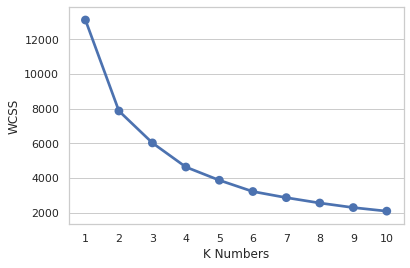

In [72]:
#The next step will be selecting the right number of clusters. So we need to choose the optimized number, and the Elbow method is one of the solutions where we can get the hints.
# the Elbow method
wcss = {}
for k in range(1, 11):
    Kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    Kmeans.fit(RFM_Scaled)
    wcss[k] = Kmeans.inertia_# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()



In [73]:
#Now we chose the number of clusters, we can build a model and make actual clusters like below. We can also check the distance between each point and the centroids or the labels of the clusters. Let’s make a new column and assign the labels to each customer.
# clustering
Clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
Clust.fit(RFM_Scaled)# Assign the clusters to datamart
RFM['K_Cluster'] = Clust.labels_
RFM.head()


,Recency,Frequency,MonetaryValue,R,F,M,Join_RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,326,2,1.00,1,1,1,111,3.0,Green,1
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold,0
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver,1
12349.0,19,73,1757.55,3,3,4,334,10.0,Silver,0
12350.0,310,17,334.40,1,1,2,112,4.0,Green,1


In [0]:
#Now we made two kinds of segmentation, RFM quantile groups and K-Means groups. Let’s make visualization and compare the two methods.
#a line plot and a heat map. We can easily compare the differences of RFM values with these two plots.
# Firstly, I’ll make columns to assign the two clustering labels. And then reshape the data frame by melting the RFM values into one column.

In [75]:
# assign cluster column 
RFM_Scaled['K_Cluster'] = Clust.labels_
RFM_Scaled['RFM_Level'] =RFM.RFM_Level
RFM_Scaled.reset_index(inplace = True)# melt the dataframe
RFM_Melted = pd.melt(frame= RFM_Scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], var_name = 'Metrics', value_name = 'Value')
RFM_Melted.head()


,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12346.0,Green,1,Recency,1.403003
1,12347.0,Gold,0,Recency,-2.075211
2,12348.0,Silver,1,Recency,0.399278
3,12349.0,Silver,0,Recency,-0.538215
4,12350.0,Green,1,Recency,1.368863


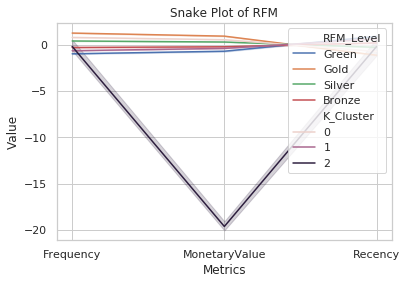

In [76]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = RFM_Melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = RFM_Melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [0]:
#This kind of plots is called ‘Snake plot’ especially in marketing analysis.
# It seems Gold and Green groups on the left plot are similar with 1 and 2 clusters on the right plot.
# And the Bronze and Silver groups seem to be merged into group 0.

[]

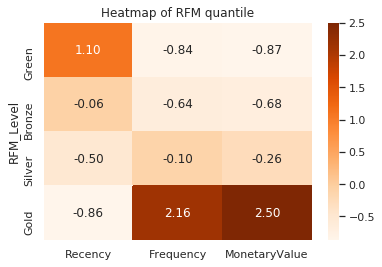

In [78]:
# the mean value in total 
Total_avg = RFM.iloc[:, 0:3].mean()
Total_avg# calculate the proportional gap with total mean
Cluster_avg = RFM.groupby('RFM_Level').mean().iloc[:, 0:3]
Prop_RFM = Cluster_avg/Total_avg - 1# heatmap with RFM
sns.heatmap(Prop_RFM, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()


[]

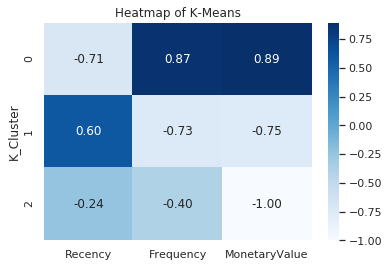

In [79]:
#And then repeat the same code for K-clusters as we did before.
# calculate the proportional gap with total mean
Cluster_avg_K = RFM.groupby('K_Cluster').mean().iloc[:, 0:3]
Prop_RFM_K = Cluster_avg_K/Total_avg - 1# heatmap with K-means
sns.heatmap(Prop_RFM_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()


In [0]:
dframe.to_csv(“file_name.csv”, sep=’delimiter’)